# EDA de los datasets 


Se realiza el Análisis Exploratorio de los datos de los tres conjuntos de datos ya limpios para finalmente elegir las variables que serán usadas para entrenar el modelo de recomendación solicitado. Esto se hace dado que es un gran volumen de información y los recursos de procesamiento y almacenamiento, sobretodo al momento de deployar el proyecto, son limitados.

## Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## EDA del dataset  `user_reviews`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `user_reviews` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [2]:
df_reviews = pd.read_csv('user_reviews.csv', encoding='utf-8')
df_reviews.head()

,posted,item_id,recommend,review,user_id,Sentiment_analysis
0,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...,76561197970982479,2
1,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.,76561197970982479,2
2,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,1
3,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...,js41637,2
4,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...,js41637,1


Se revisan los tipos de datos y cantidad de nulos si hay.

In [3]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')


La cantidad de registros que hay son: 58431


Se tienen 58431 registros de opiniones de los usuarios respecto a los juegos que consumen. Si bien no hay nulos.

### Columnas 'sentiment_analysis' y 'reviews_recommend'

In [5]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['Sentiment_analysis', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
Sentiment_analysis recommend                      
0                  False          2470    4.227208
                   True           5500    9.412812
1                  False          3175    5.433759
                   True          21398   36.620972
2                  False          1094    1.872294
                   True          24794   42.432955

Se puede ver que el sentimiento neutral recomienda el juego por lo que un sentimiento neutral podría estar relacionado con un comentario sencillo sin muchos detalles pero que aún así el juego le gustó como para recomendar. Por otra parte, de los comentarios que reflejaron un sentimiento negativo, aún recomienda el juego, lo que es algo contradictorio.

In [6]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_reviews['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 25458


Un total de 25458 usurarios dieron su opinión sobre el juego que consumen, con lo que un usuario hizo mas de un comentario.

### Columna 'reviews_date'

Se revisan la cantidad de fechas con formato inválido o que no tenían fecha en el conjunto de datos original.

In [8]:
print(f'La cantidad de fechas en formato inválido son: {len(df_reviews[df_reviews["posted"]=="Formato inválido"])}')

La cantidad de fechas en formato inválido son: 0


No hay registros que no contienen la fecha del review.

## EDA del dataset  `steam_games`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `steam_games` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [15]:
df_games = pd.read_csv('output.csv', encoding='utf-8')
df_games.head()

,publisher,genres,app_name,release_date,price,id,developer
0,2K Games,['Strategy'],Railroad Tycoon II Platinum,1998-10-31,4.99,7620.0,PopTop
1,2K Games,['Strategy'],X-COM: Terror From the Deep,1995-04-01,4.99,7650.0,"MicroProse Software, Inc"
2,"Square Enix, Feral Interactive (Mac)","['Action', 'Adventure']",Tomb Raider: Anniversary,2007-06-05,8.99,8000.0,"Crystal Dynamics,Feral Interactive (Mac)"
3,Capcom,['Action'],Devil May Cry® 3 Special Edition,2006-05-23,19.99,6550.0,"CAPCOM Co., Ltd."
4,Telltale Games,"['Action', 'Adventure']",Sam & Max 101: Culture Shock,2006-10-17,19.99,8200.0,Telltale Games


Se revisan los tipos de datos y cantidad de nulos si hay.

In [16]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_games.shape[0]}')

La cantidad de registros que hay son: 22767


Este conjunto de datos tiene 7 columnas y 22767 registros. Para recordar, contiene la información relacionada a cada juego como el precio, el año de lanzamiento, el nombre de la aplicación y del juego, el desarrollador y el publicitador, así como el género. Hay que tener en cuenta que la información se repite porque un juego puede pertenecer a mas de un género.

### Columnas 'id', 'app_name' y 'title'

Estas columnas hacen referencia al identificador único del juego y los nombres de la aplicación y del título del juego. Estos últimos no tienen mayor información que analizar en este momento. Con el 'id' se puede calcular la cantidad de juegos.

In [17]:
total_juegos = len(df_games['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 22767


Hay un total de 22767 juegos en la plataforma.

### Columna 'genres'

In [34]:
df_games=(df_games, 'genres')
df_games

((                                  publisher  \
  0                                  2K Games   
  1                                  2K Games   
  2      Square Enix, Feral Interactive (Mac)   
  3                                    Capcom   
  4                            Telltale Games   
  ...                                     ...   
  22762                       Bidoniera Games   
  22763                       Ghost_RUS Games   
  22764                                Sacada   
  22765                          Laush Studio   
  22766                              SIXNAILS   
  
                                                genres  \
  0                                       ['Strategy']   
  1                                       ['Strategy']   
  2                            ['Action', 'Adventure']   
  3                                         ['Action']   
  4                            ['Action', 'Adventure']   
  ...                                              ...   
  2

Los juegos estan categorizados mayormente en las categorías *Indi*, *Action*, *Casual* y *Adventure*. Cabe recordar que un juego puede tener mas de un género asociado.

## EDA del dataset  `users_items`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `users_items`  que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [36]:
df_items = pd.read_csv('user_items.csv', encoding='utf-8')
df_items.head()

,user_id,item_id,playtime_forever
0,76561197970982479,10.0,6.0
1,76561197970982479,30.0,7.0
2,76561197970982479,300.0,4733.0
3,76561197970982479,240.0,1853.0
4,76561197970982479,3830.0,333.0


Se revisan los tipos de datos y cantidad de nulos si hay.

In [37]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')


La cantidad de registros que hay son: 4718520


Este conjunto de datos tiene 7 columnas y 4718520 registros. Para recordar, contiene la información relacionada los usuarios y los juegos que consumen como el tiempo acumulado (en minutos) que han jugado a un juego, la cantidad de items que consumen así como los identificadores de los juegos que consumen y del propio usuario y la url del perfil del mismo.

### Columna 'playtime_forever'

Estas columnas hacen referencia al tiempo en minutos acumulados que un usuario ha jugado.

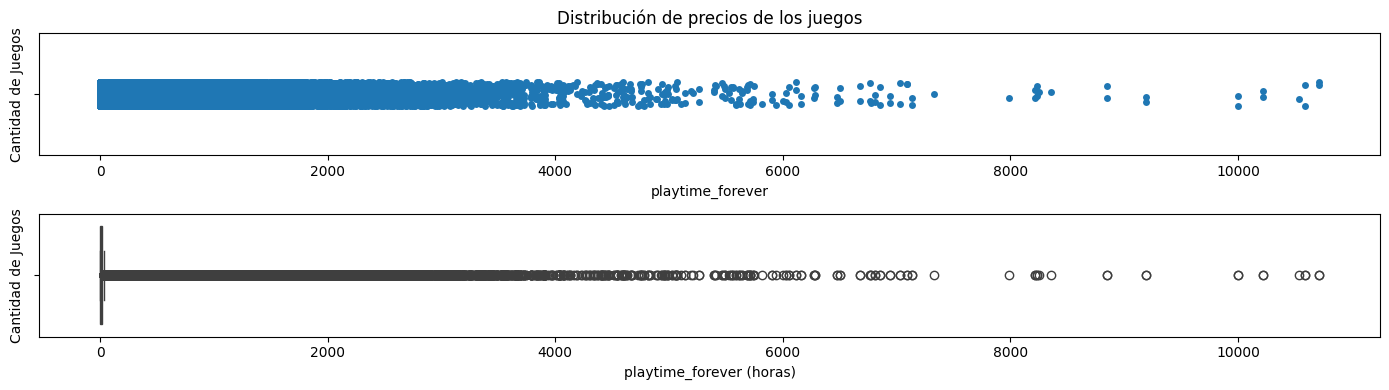

In [38]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

Los Outlier, se deben a que no hay una medida exacta de lo que una persona puede jugar a algo

In [40]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')


El precio medio (mediana) de los juegos es de: 3.5
El precio promedio (mean) de los juegos es de: 26.46
El 75% de los juegos tienen un precio menor de: 13.65


C:\Users\marce\AppData\Local\Temp\ipykernel_10176\2134348782.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
C:\Users\marce\AppData\Local\Temp\ipykernel_10176\2134348782.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
C:\Users\marce\AppData\Local\Temp\ipykernel_10176\2134348782.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Dat